# Agglomerative

In [7]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram ,linkage
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.cluster import KMeans

In [8]:
#create synthethic data
x , _ = make_blobs(n_samples=100,centers=3,cluster_std=1.0)

In [9]:
model = AgglomerativeClustering(n_clusters=3,linkage="ward")
labels = model.fit_predict(x)

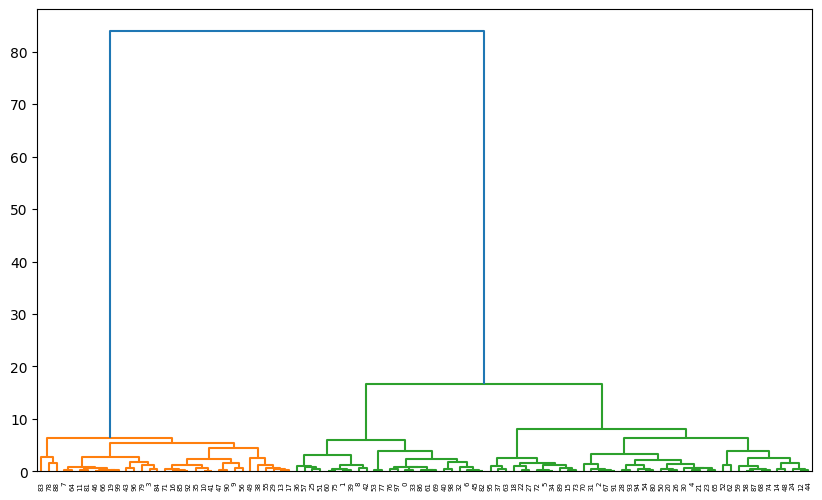

In [10]:
#dendogarm
linked = linkage(x,method="ward")
plt.figure(figsize=(10,6))
dendrogram(linked)
plt.xticks(rotation =90)
plt.show()

In [11]:
#see the dataset
x

array([[ 2.19350444,  3.13257699],
       [ 0.7138075 ,  2.39590056],
       [ 4.55580034,  3.94955566],
       [-5.16678305, -5.3161377 ],
       [ 4.15820593,  3.66657201],
       [ 5.01628548,  3.29328552],
       [ 2.43746277,  3.75318405],
       [-5.84576906, -6.11598877],
       [-0.15813509,  2.06731435],
       [-6.51816931, -6.26823125],
       [-4.82177075, -6.87310103],
       [-5.32735556, -6.13277932],
       [ 4.13967555,  2.30307255],
       [-4.15111864, -6.49681945],
       [ 4.12621184,  1.3240646 ],
       [ 5.70346118,  3.57464047],
       [-5.24702064, -6.84953   ],
       [-4.23132166, -6.62297274],
       [ 5.98559029,  4.49792179],
       [-5.42082948, -5.75486635],
       [ 4.29215884,  2.92792756],
       [ 4.11679115,  3.45054688],
       [ 5.37930364,  3.74818675],
       [ 3.97769843,  3.11400434],
       [ 4.19447822,  1.87653456],
       [ 1.81671344,  1.13354253],
       [ 4.46779453,  3.02814023],
       [ 5.40318598,  3.99947008],
       [ 3.04306629,

# Divisive

In [ ]:
X, _ = make_blobs(n_samples=100,
                  centers=1,
                  cluster_std=2,
                  random_state=42)


In [13]:
def divisive_clustering(data,max_cluster = 4):
    clusters =[data] ## start with one big cluster
    labels = np.zeros(len(data), dtype=int)
    while len(clusters) < max_cluster:
        # find the cluster iwth the largest number of points
        idx_to_split = np.argmax([len(c) for c in clusters]) #argmax returns the index of the largest element in the array
        # this is the cluster  we want to split next
        clusters_to_split = clusters.pop(idx_to_split)
        # get a new label to assign to the newly formed clusters
        current_label = np.max(labels) + 1
        # kmeans to split the cluster
        kmeans = KMeans(n_clusters=2,random_state=42)
        split_labels = kmeans.fit_predict(clusters_to_split)
        # divides the cluster into two based on kmeans data
        clusters1 = clusters_to_split[split_labels == 0]
        clusters2 = clusters_to_split[split_labels == 1]
        # add the newly formed clusters to the list of clusters
        clusters.append(clusters1)
        clusters.append(clusters2)
        # update label assignment
        labels_indices = np.where([np.any(np.all(x == clusters_to_split,axis=1))for x in data])[0]     

        labels_subset = split_labels
        labels[labels_indices] = current_label
        labels[labels_indices[labels_subset == 0]] = current_label 
        labels[labels_indices[labels_subset == 1]] = current_label + 1
    return labels


In [14]:
cluster_label = divisive_clustering(X, max_cluster=4)

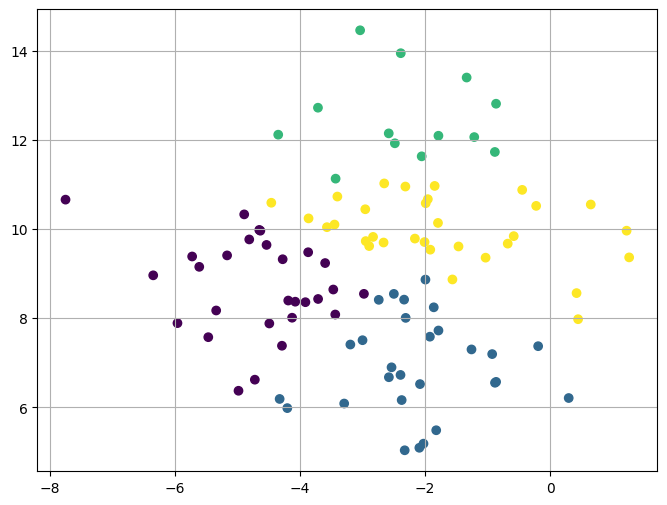

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=cluster_label)
plt.grid(True)
plt.show()